# 1. - Bajar información relevante

In [1]:
import sys
import pandas as pd 
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn import metrics
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_loan_train = pd.read_csv('../data/train_data_processed.csv')
df_loan_test = pd.read_csv('../data/test_data_processed.csv')
df_loan_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      159213         Cash loans           F            N               Y   
1      151735         Cash loans           M            Y               Y   
2      381923         Cash loans           F            N               N   
3      432341         Cash loans           M            Y               Y   
4      273574         Cash loans           F            N               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           0.0           67500.0    675000.0      19476.0         675000.0   
1           2.0          315000.0   1288350.0      37800.0        1125000.0   
2           1.0          112500.0    450000.0      25834.5         450000.0   
3           0.0          270000.0   1079581.5      52065.0         886500.0   
4           0.0           90000.0    204858.0      14386.5         171000.0   

   ... FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 TARGET  \
0  ...                0                0                0      0   
1  ...                0                0                0      0   
2  ...                0                0                0      0   
3  ...                0                0                0      0   
4  ...                0                0                0      0   

  AMT_REQ_CREDIT_BUREAU_HOUR_input  AMT_REQ_CREDIT_BUREAU_DAY_input  \
0                              0.0                              0.0   
1                              0.0                              0.0   
2                              0.0                              0.0   
3                              0.0                              0.0   
4                              0.0                              0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK_input  AMT_REQ_CREDIT_BUREAU_MON_input  \
0                               0.0                              0.0   
1                               0.0                              0.0   
2                               0.0                              0.0   
3                               1.0                              0.0   
4                               0.0                              0.0   

   AMT_REQ_CREDIT_BUREAU_QRT_input  AMT_REQ_CREDIT_BUREAU_YEAR_input  
0                              0.0                               1.0  
1                              0.0                               4.0  
2                              0.0                               0.0  
3                              0.0                               3.0  
4                              0.0                               3.0  

[5 rows x 106 columns]

# 2. - Codificación variables categóricas

La codificación de variables categóricas tiene como propósito transformar datos categóricos en un formato numérico que pueda ser entendido y procesado por algoritmos de machine learning. Dado que la mayoría de los modelos estadísticos y de machine learning no trabajan directamente con datos no numéricos, es necesario convertir las categorías en representaciones matemáticas. La codificación garantiza que estas transformaciones preserven las relaciones y patrones subyacentes en los datos, minimizando la pérdida de información.

Tipos de Codificación
1. **One-Hot Encoding**
    - Consiste en: Crear una nueva columna binaria (0/1) para cada categoría en la variable original. Si una fila pertenece a una categoría, la columna correspondiente toma el valor 1; de lo contrario, toma 0.
    - Se suele aplicar: A variables categóricas nominales (sin orden inherente), como colores, ciudades, o marcas. Es ideal para variables con pocas categorías.
    - Ejemplo: La categoría "Color" con valores {Rojo, Azul, Verde} generaría tres columnas: "Color_Rojo", "Color_Azul", "Color_Verde".
2. **Label Encoding**
    - Consiste en: Asignar un número entero a cada categoría de la variable (e.g., "Rojo" = 0, "Azul" = 1, "Verde" = 2).
    - Se suele aplicar: A variables categóricas ordinales (donde existe un orden lógico entre categorías), como niveles educativos ("Bajo", "Medio", "Alto").
    - Ejemplo: La categoría "Tamaño" con valores {Pequeño, Mediano, Grande} podría codificarse como {0, 1, 2}, respetando el orden inherente.
3. **Binary Encoding**
    - Consiste en: Convertir las categorías en valores binarios y utilizar las posiciones binarias como columnas. Este método reduce el número de columnas en comparación con One-Hot Encoding.
    - Se suele aplicar: A variables con alta cardinalidad (muchas categorías) para reducir la dimensionalidad mientras se preserva información.
    - Ejemplo: Una categoría con valores {1, 2, 3, 4} podría transformarse en sus representaciones binarias: {00, 01, 10, 11}.
4. **Target Encoding (Codificación Basada en el Objetivo)**
    - Consiste en: Sustituir cada categoría por una estadística calculada a partir de la variable objetivo (e.g., media, proporción o mediana de la categoría con respecto al objetivo).
    - Se suele aplicar: En problemas supervisados donde la variable objetivo está disponible, y particularmente útil para variables categóricas con alta cardinalidad.
    - Ejemplo: Si la variable objetivo es binaria (0/1), la categoría "A" podría reemplazarse con la proporción de 1 dentro de esa categoría.
5. **Frequency Encoding**
    - Consiste en: Sustituir cada categoría por la frecuencia relativa o absoluta con la que aparece en la columna.
    - Se suele aplicar: A variables categóricas con muchas categorías, especialmente cuando la frecuencia tiene un significado relevante en el análisis.
    - Ejemplo: Si la categoría "A" aparece en el 50% de las filas, se codificaría con el valor 0.5.
6. **Hashing Encoding**
    - Consiste en: Aplicar una función hash para asignar cada categoría a un espacio reducido de columnas, basado en el resultado del hash. No requiere conocer todas las categorías por adelantado.
    - Se suele aplicar: A datasets muy grandes con variables categóricas de muy alta cardinalidad, o en sistemas en tiempo real donde las categorías no son fijas.
    - Ejemplo: La categoría "Rojo" podría mapearse a un hash único como columna binaria dentro de un espacio reducido.



## 2.1. - Análisis 

In [3]:
lista_variables_codificar = df_loan_train.select_dtypes('object').columns.to_list()
df_loan_train[lista_variables_codificar].nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               19
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
HOUSETYPE_MODE                 4
WALLSMATERIAL_MODE             8
EMERGENCYSTATE_MODE            3
dtype: int64

In [4]:
df_loan_train.WEEKDAY_APPR_PROCESS_START.value_counts() 

WEEKDAY_APPR_PROCESS_START
TUESDAY      43245
WEDNESDAY    41607
MONDAY       40656
THURSDAY     40340
FRIDAY       40163
SATURDAY     27115
SUNDAY       12882
Name: count, dtype: int64

He decidido aplicar diferentes tipos de codificación en función de las características específicas de las variables categóricas de mi dataset para maximizar la información que aportan al modelo, manteniendo la simplicidad y evitando introducir relaciones artificiales.

1. One-Hot Encoding: Este método será aplicado a la mayoría de las variables categóricas, ya que presentan un número reducido de categorías y no tienen un orden inherente. Este enfoque es ideal para variables nominales, permitiendo representar cada categoría como una columna independiente sin introducir relaciones ficticias entre ellas. Además, al no tener demasiadas categorías, no se generará un problema significativo de aumento de dimensionalidad.

2. Label Encoding para WEEKDAY_APPR_PROCESS_START: Para esta variable, que representa el día de la semana en el que se inicia el proceso de aprobación, aplicaré Label Encoding. Aunque no es una variable ordinal estricta, existe un orden implícito en los días de la semana que puede ser relevante para el modelo. Este método asignará un valor numérico a cada día (por ejemplo, 0 para lunes, 1 para martes, etc.), respetando el orden natural de esta variable.

3. Target Encoding para ORGANIZATION_TYPE y OCCUPATION_TYPE: Estas variables tienen un alto número de categorías (alta cardinalidad), lo que las hace poco adecuadas para métodos como One-Hot Encoding. Aplicaré Target Encoding, que reemplazará cada categoría con una estadística calculada a partir de la variable objetivo, como la media de TARGET para cada categoría. Este enfoque permite conservar la relación entre estas categorías y la variable objetivo, optimizando su utilidad en modelos supervisados.


## 2.2. - Proceso de codificación

In [5]:
X_train = df_loan_train.drop('TARGET',axis=1)
X_test = df_loan_test.drop('TARGET',axis=1)
y_train = df_loan_train['TARGET']
y_test = df_loan_test['TARGET']

In [6]:
## LABEL ENCODING 

from sklearn.preprocessing import LabelEncoder

# Crear el codificador
label_encoder = LabelEncoder()

# Aplicar Label Encoding en WEEKDAY_APPR_PROCESS_START en el conjunto de entrenamiento
X_train['WEEKDAY_APPR_PROCESS_START'] = label_encoder.fit_transform(X_train['WEEKDAY_APPR_PROCESS_START'])

# Aplicar el mismo mapeo en el conjunto de prueba
X_test['WEEKDAY_APPR_PROCESS_START'] = label_encoder.transform(X_test['WEEKDAY_APPR_PROCESS_START'])

# Verificar el resultado
print("Valores únicos tras codificación en entrenamiento:", X_train['WEEKDAY_APPR_PROCESS_START'].unique())
print("Valores únicos tras codificación en prueba:", X_test['WEEKDAY_APPR_PROCESS_START'].unique())


Valores únicos tras codificación en entrenamiento: [1 0 5 4 6 2 3]
Valores únicos tras codificación en prueba: [0 3 1 4 5 6 2]


In [7]:
### TARGET ENCODING
import category_encoders as ce

# Variables a codificar
target_columns = ['ORGANIZATION_TYPE', 'OCCUPATION_TYPE']

# Crear y ajustar el codificador de Target Encoding
target_enc = ce.TargetEncoder(cols=target_columns)
target_enc.fit(X_train[target_columns], y_train)  # Ajustar usando el conjunto de entrenamiento

# Transformar directamente X_train y X_test
X_train[target_columns] = target_enc.transform(X_train[target_columns])
X_test[target_columns] = target_enc.transform(X_test[target_columns])

# Verificar formas finales y primeras filas
print("Formas finales:", X_train.shape, X_test.shape)
print("Primeras filas de entrenamiento:\n", X_train[target_columns].head())
print("Primeras filas de prueba:\n", X_test[target_columns].head())


lista_variables_codificar.remove('ORGANIZATION_TYPE')
lista_variables_codificar.remove('OCCUPATION_TYPE')
lista_variables_codificar.remove('WEEKDAY_APPR_PROCESS_START')

Formas finales: (246008, 105) (61503, 105)
Primeras filas de entrenamiento:
    ORGANIZATION_TYPE  OCCUPATION_TYPE
0           0.101976         0.096905
1           0.065301         0.062554
2           0.092402         0.062554
3           0.084058         0.062075
4           0.054438         0.064856
Primeras filas de prueba:
    ORGANIZATION_TYPE  OCCUPATION_TYPE
0           0.054438         0.064856
1           0.079245         0.105153
2           0.093034         0.064856
3           0.069612         0.105153
4           0.054438         0.064856


In [8]:
### One-hot encding

# Crear y aplicar One-Hot Encoder
ohe = ce.OneHotEncoder(cols=lista_variables_codificar, use_cat_names=True)
ohe.fit(X_train, y_train)  

# Transformar X_train y X_test
X_train = ohe.transform(X_train)
X_test = ohe.transform(X_test)

# Verificar formas finales
print(X_train.shape, X_test.shape)

(246008, 149) (61503, 149)


Después de realizar las transformaciones y codificaciones en el dataset, la dimensionalidad ha aumentado de 106 variables iniciales a 149 variables. Este incremento se debe principalmente a la aplicación de técnicas como One-Hot Encoding y Target Encoding, que han generado nuevas columnas para representar las categorías originales de manera numérica. Aunque el aumento en el número de variables puede incrementar la complejidad del modelo, estas transformaciones son esenciales para garantizar que la información categórica sea correctamente interpretada por los algoritmos de machine learning.



# 3. - Escalado de variables

El escalado de variables tiene como objetivo normalizar o estandarizar las características del dataset para garantizar que todas tengan un rango similar o comparable. Esto es especialmente importante en algoritmos que dependen de la magnitud de las variables o que calculan distancias, como regresión logística, SVM, k-NN, y redes neuronales. Variables con diferentes escalas (por ejemplo, ingresos en miles frente a edad en años) pueden causar que el modelo otorgue más importancia a unas características simplemente por su magnitud.

Métodos de Escalado de Variables

1. Min-Max Scaling (Normalización):
    - Escala las variables para que sus valores estén dentro de un rango definido, generalmente entre 0 y 1.
    - Resta el valor mínimo de la variable y lo divide por el rango total (máximo - mínimo).
    - Datos con distribuciones conocidas y sin outliers.

2. StandardScaler (Estandarización):
    - Ajusta las variables para que tengan media 0 y desviación estándar 1.
    - Resta la media y divide entre la desviación estándar.
    - Modelos sensibles a magnitudes o rangos, como SVM, regresión logística o PCA.

3. RobustScaler:
    - Escala las variables usando los cuartiles, siendo robusto frente a valores atípicos.
    - ustituye la media por la mediana y divide por el rango intercuartílico (IQR).
    - Datos con outliers extremos que podrían distorsionar otros métodos.

4. MaxAbsScaler:
    - Escala las variables dividiendo por el valor absoluto máximo, ajustando el rango entre -1 y 1.
    - Cada valor se divide por el valor absoluto más grande en su columna.
    - Datos dispersos o representados como matrices esparsas.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model_scaled = scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [10]:
X_train_scaled.describe()

SK_ID_CURR  NAME_CONTRACT_TYPE_Cash loans  \
count  2.460080e+05                   2.460080e+05   
mean   2.014330e-16                  -2.888291e-19   
std    1.000002e+00                   1.000002e+00   
min   -1.733579e+00                  -3.080923e+00   
25%   -8.673068e-01                   3.245780e-01   
50%    2.582610e-03                   3.245780e-01   
75%    8.656491e-01                   3.245780e-01   
max    1.730169e+00                   3.245780e-01   

       NAME_CONTRACT_TYPE_Revolving loans  CODE_GENDER_F  CODE_GENDER_M  \
count                        2.460080e+05   2.460080e+05   2.460080e+05   
mean                         2.888291e-19  -2.812474e-18   3.813988e-17   
std                          1.000002e+00   1.000002e+00   1.000002e+00   
min                         -3.245780e-01  -1.386971e+00  -7.209694e-01   
25%                         -3.245780e-01  -1.386971e+00  -7.209694e-01   
50%                         -3.245780e-01   7.209954e-01  -7.209694e-01   
75%                         -3.245780e-01   7.209954e-01   1.387021e+00   
max                          3.080923e+00   7.209954e-01   1.387021e+00   

       CODE_GENDER_XNA  FLAG_OWN_CAR_N  FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_Y  \
count     2.460080e+05    2.460080e+05    2.460080e+05       2.460080e+05   
mean      8.033060e-19   -7.079202e-17    7.079202e-17      -5.155600e-18   
std       1.000002e+00    1.000002e+00    1.000002e+00       1.000002e+00   
min      -4.032356e-03   -1.395266e+00   -7.167090e-01      -1.505871e+00   
25%      -4.032356e-03   -1.395266e+00   -7.167090e-01      -1.505871e+00   
50%      -4.032356e-03    7.167090e-01   -7.167090e-01       6.640677e-01   
75%      -4.032356e-03    7.167090e-01    1.395266e+00       6.640677e-01   
max       2.479940e+02    7.167090e-01    1.395266e+00       6.640677e-01   

       FLAG_OWN_REALTY_N  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
count       2.460080e+05  ...      2.460080e+05      2.460080e+05   
mean        5.155600e-18  ...     -2.385729e-17      8.780405e-18   
std         1.000002e+00  ...      1.000002e+00      1.000002e+00   
min        -6.640677e-01  ...     -9.055708e-02     -2.386234e-02   
25%        -6.640677e-01  ...     -9.055708e-02     -2.386234e-02   
50%        -6.640677e-01  ...     -9.055708e-02     -2.386234e-02   
75%         1.505871e+00  ...     -9.055708e-02     -2.386234e-02   
max         1.505871e+00  ...      1.104276e+01      4.190704e+01   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR_input  \
count      2.460080e+05      2.460080e+05                      2.460080e+05   
mean       1.379159e-18     -6.910237e-18                     -3.364859e-18   
std        1.000002e+00      1.000002e+00                      1.000002e+00   
min       -2.218324e-02     -1.859131e-02                     -8.251899e-02   
25%       -2.218324e-02     -1.859131e-02                     -8.251899e-02   
50%       -2.218324e-02     -1.859131e-02                     -8.251899e-02   
75%       -2.218324e-02     -1.859131e-02                     -8.251899e-02   
max        4.507909e+01      5.378858e+01                      5.095343e+01   

       AMT_REQ_CREDIT_BUREAU_DAY_input  AMT_REQ_CREDIT_BUREAU_WEEK_input  \
count                     2.460080e+05                      2.460080e+05   
mean                      2.327963e-17                     -5.611950e-17   
std                       1.000002e+00                      1.000002e+00   
min                      -6.683547e-02                     -1.780977e-01   
25%                      -6.683547e-02                     -1.780977e-01   
50%                      -6.683547e-02                     -1.780977e-01   
75%                      -6.683547e-02                     -1.780977e-01   
max                       8.840553e+01                      4.212354e+01   

       AMT_REQ_CREDIT_BUREAU_MON_input  AMT_REQ_CREDIT_BUREAU_QRT_input  \
count                     2.460080e+05                    

# 4. - Selección de variables 

La selección de características supervisada se centra en identificar las variables más relevantes para predecir una variable objetivo, mejorando así el rendimiento del modelo y reduciendo el riesgo de sobreajuste. Utiliza la relación entre las características y el target para tomar decisiones, empleando diversas técnicas que varían en su complejidad y costo computacional.

### Métodos de Filtro
Los métodos de filtro analizan la relación entre cada característica y la variable objetivo de forma independiente, basándose en métricas estadísticas. Son rápidos y escalables, lo que los convierte en una buena opción para un primer filtrado en conjuntos de datos grandes.
Un ejemplo común es el uso de la correlación de Pearson para identificar relaciones lineales en problemas de regresión. Para datos categóricos, el test Chi-cuadrado evalúa la dependencia entre variables. Otra métrica útil es la información mutua, que mide cuánta información comparte una característica con el target, capturando relaciones más complejas.

Aunque efectivos en reducir el número de variables, estos métodos no consideran interacciones entre características, lo que limita su capacidad para identificar conjuntos óptimos de variables.

### Métodos de Envoltura
A diferencia de los métodos de filtro, los métodos de envoltura seleccionan conjuntos de características basándose en su impacto en el rendimiento del modelo. Aquí, el modelo se entrena varias veces con diferentes subconjuntos de variables, y se elige el conjunto que maximiza una métrica de evaluación.

Un enfoque típico es la selección hacia adelante (Forward Selection), que comienza con un conjunto vacío y agrega características que mejoran el modelo de manera incremental. Por otro lado, la eliminación hacia atrás (Backward Elimination) comienza con todas las variables y elimina aquellas que no contribuyen significativamente al rendimiento. Un método más sofisticado es el Recursive Feature Elimination (RFE), que elimina características de forma iterativa según su importancia.

Aunque estos métodos son precisos y capturan interacciones entre variables, son computacionalmente costosos, especialmente en conjuntos de datos grandes.

### Métodos Embebidos
Los métodos embebidos realizan la selección de características durante el entrenamiento del modelo, integrando este proceso en el ajuste de los parámetros. Este enfoque es más eficiente que los métodos de envoltura, ya que no requiere entrenar el modelo múltiples veces.

Un ejemplo popular es la regresión Lasso, que utiliza regularización L1 para penalizar coeficientes, forzando a algunos a ser cero y eliminando así características irrelevantes. Los árboles de decisión y los bosques aleatorios también realizan selección de características de manera natural, asignando importancia a cada variable en función de su contribución a la reducción del error.

Este enfoque es una buena combinación de eficiencia y efectividad, aunque depende del modelo utilizado y puede no ser tan flexible si se cambia de algoritmo.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from boruta import BorutaPy # conda install -c conda-forge boruta_py

## 4.1. - Regularización Lasso y Ridge

### (L1 Regularization, Lasso):
Efecto en los coeficientes: Lasso agrega la suma de los valores absolutos de los coeficientes a la función de costo. Esto permite que algunos coeficientes se vuelvan exactamente cero.

- Razón: La función de valor absoluto tiene una pendiente constante, lo que permite que Lasso elimine por completo ciertas características cuando la penalización es suficientemente alta.

- Beneficio: Lasso es particularmente útil para la selección de características. Cuando hay muchas variables, pero solo unas pocas son realmente importantes, Lasso ayuda a simplificar el modelo eliminando automáticamente aquellas características irrelevantes. Esto mejora la interpretabilidad y reduce el riesgo de sobreajuste.


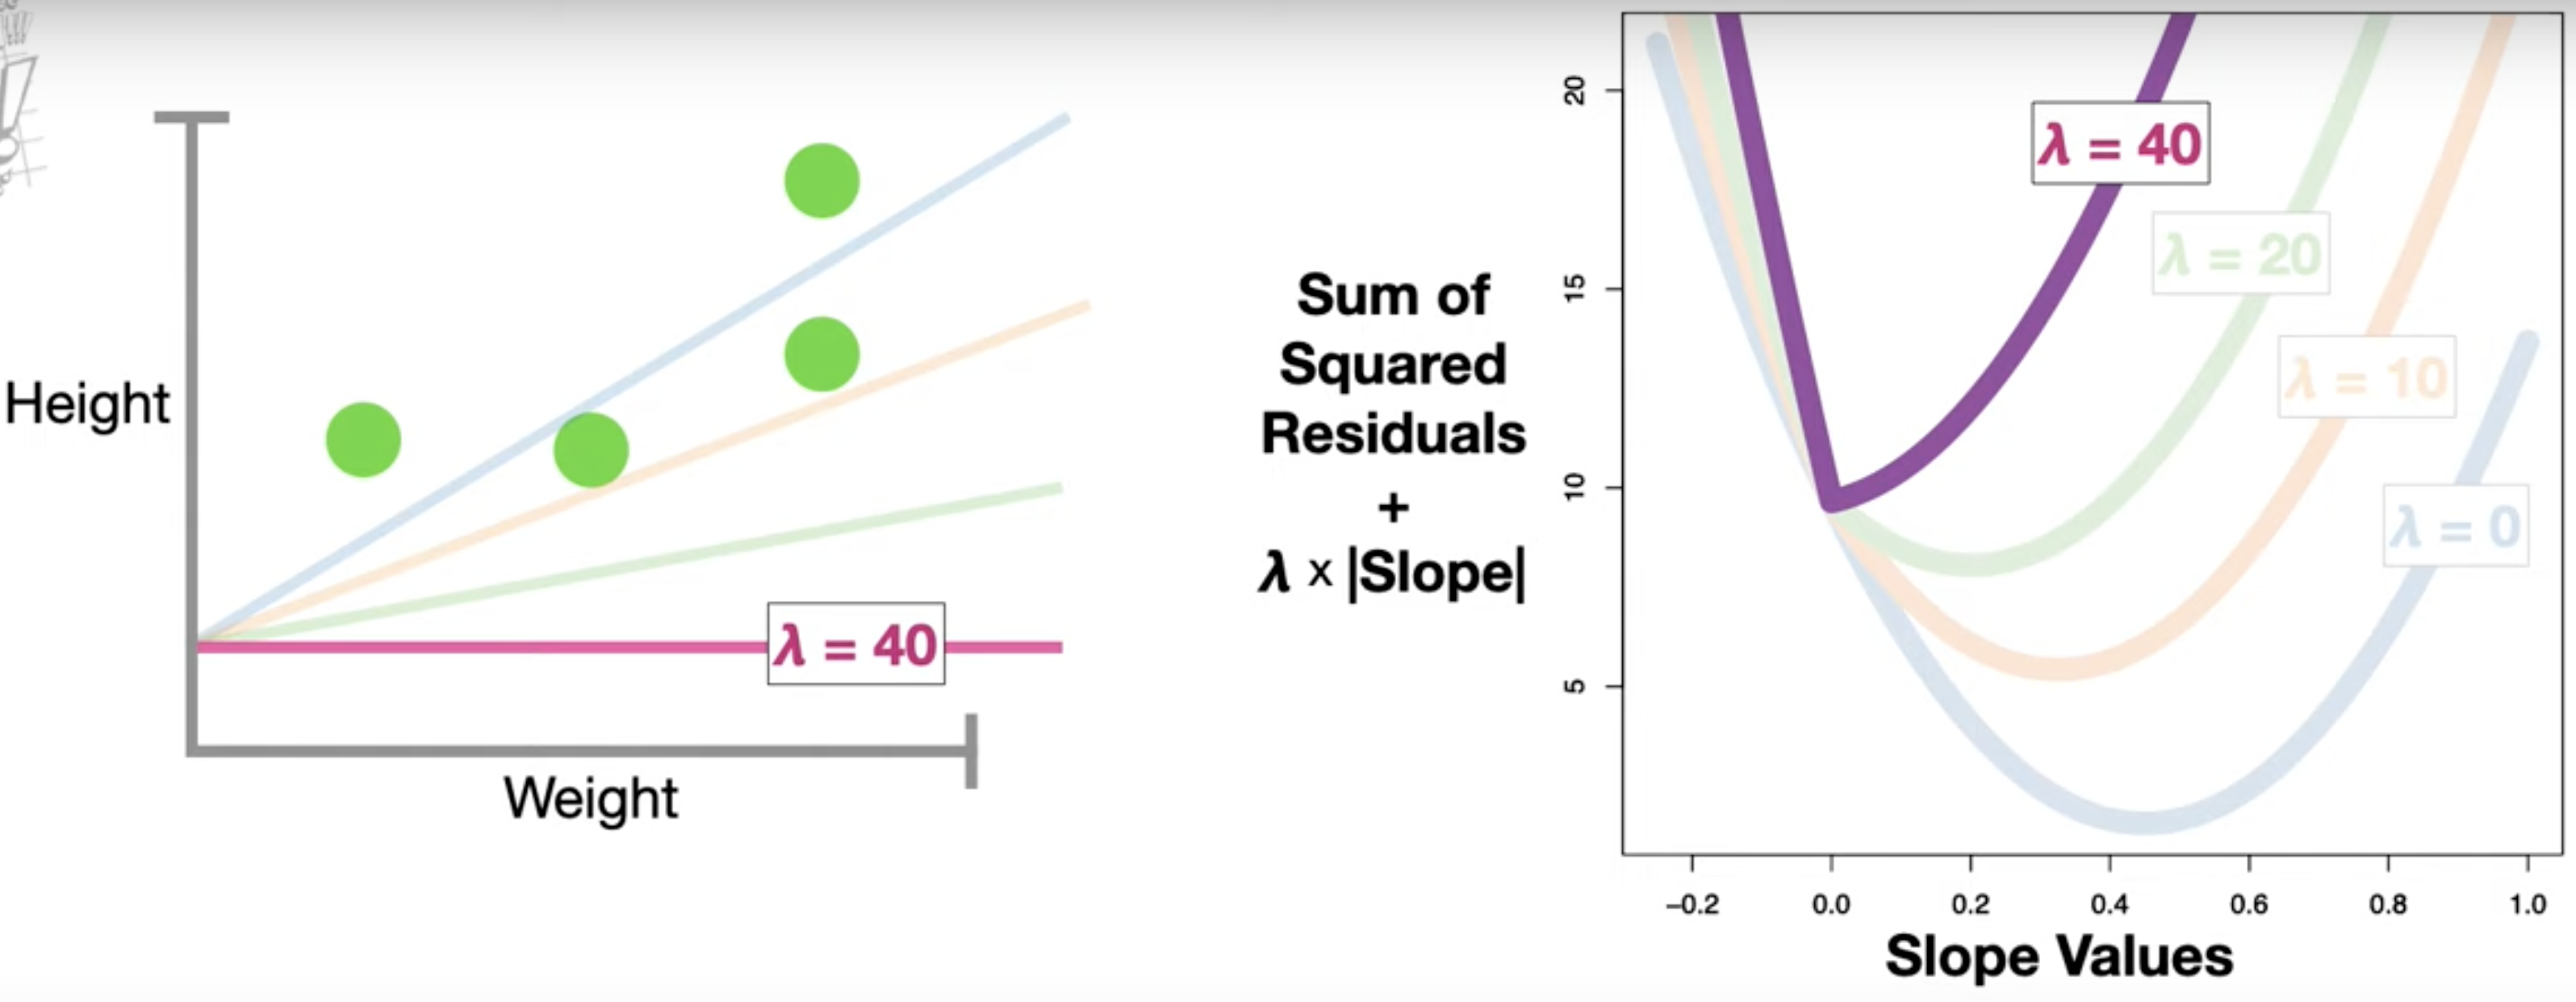


### (L2 Regularization, Ridge):
Efecto en los coeficientes: Ridge penaliza el tamaño de los coeficientes al agregar el cuadrado de sus magnitudes a la función de costo. Esto significa que se reducen los coeficientes grandes, pero ninguno se vuelve exactamente cero.

- Razón: La función cuadrática nunca puede ser cero a menos que el coeficiente también lo sea, pero Ridge favorece soluciones donde todos los coeficientes tienen algún peso.
Ejemplo: Si tienes muchas características que aportan información útil, pero algunas tienen más influencia que otras, Ridge ajustará los coeficientes para que no dominen, permitiendo que el modelo sea más estable y menos propenso al sobreajuste (overfitting).

- Beneficio: En situaciones donde todas las variables aportan algo al modelo (aunque sea marginal), Ridge asegura que todas permanezcan. Esto es útil en dominios donde eliminar variables puede ser costoso o donde el conocimiento experto sugiere que cada variable tiene algún valor predictivo.

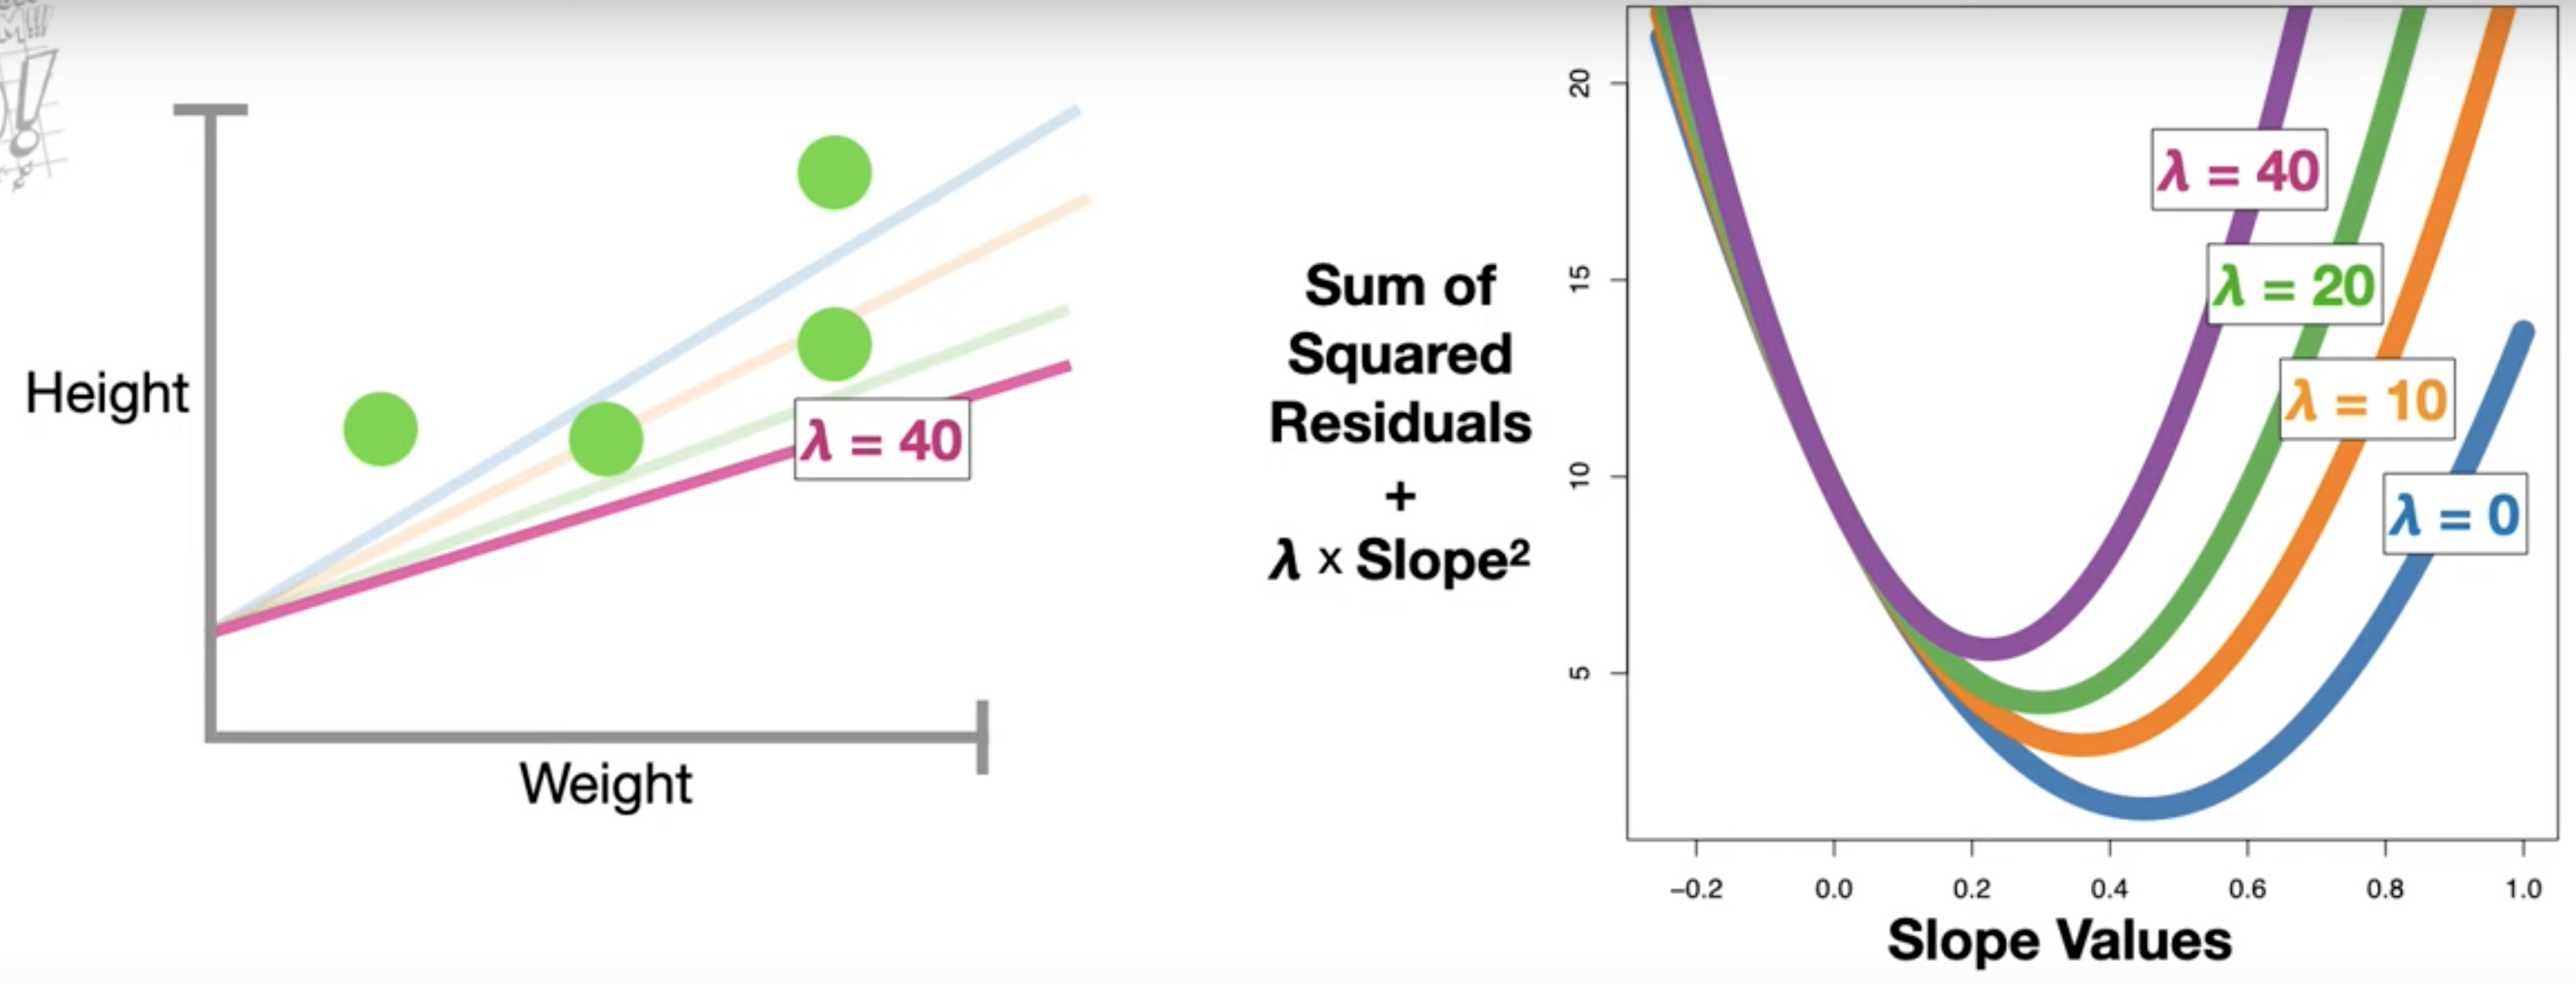

## 4.1.2. - Ridge

In [63]:
## C = 1/ Lambda
## threshold --> el umbral de los coeficientes (w)
## weighted_class = 'balanced', al final del notebook he explicado porque he decidido no usarlo

sel_ridge = SelectFromModel(LogisticRegression(C=1, penalty='l2'), threshold = 0.1)
sel_ridge.fit(X_train_scaled, y_train)
# Si aplicas transform(X_train_scaled, y_train) y transform(X_test_scaled, y_test), filtra las variables seleccionadas 


/opt/miniconda3/envs/aa_p2_eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SelectFromModel(estimator=LogisticRegression(C=1), threshold=0.1)

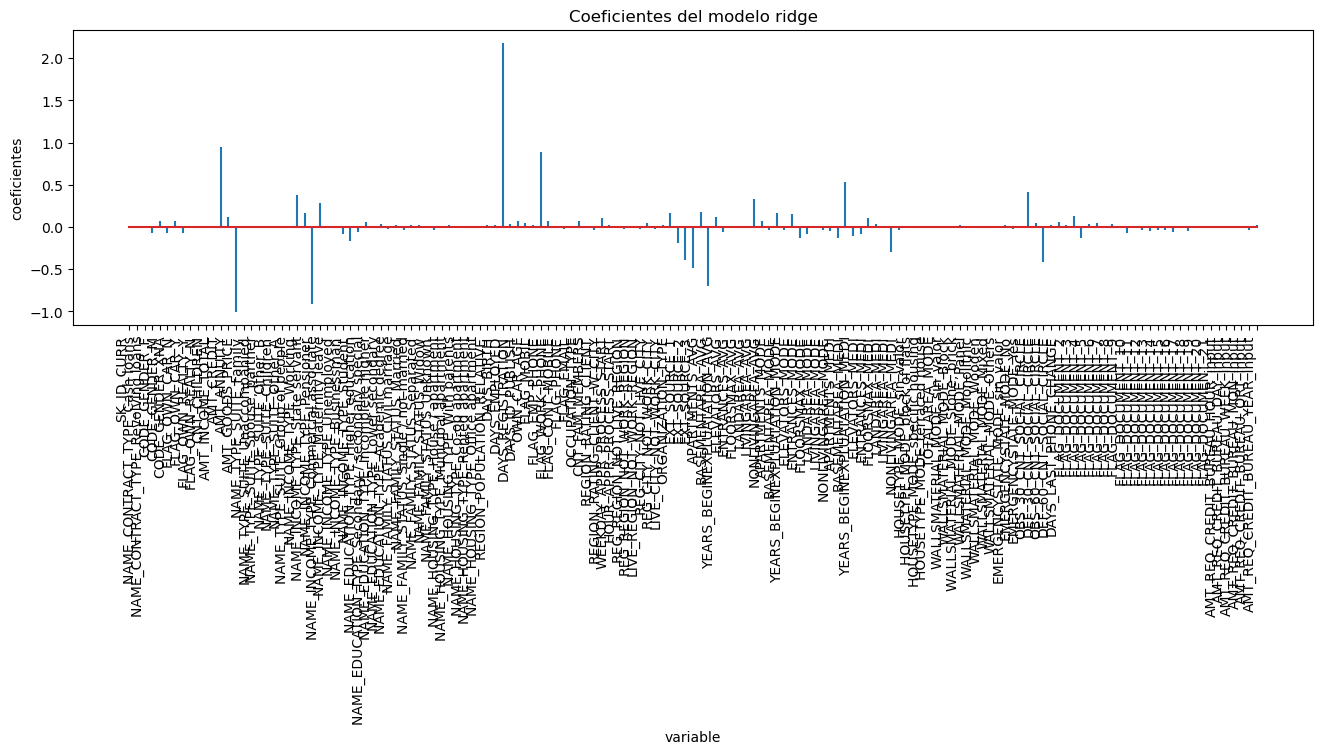

In [57]:
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train_scaled.columns,
                         'coef': sel_ridge.estimator_.coef_.flatten()}
                  )


## Graficamos los coeficientes del modelo 
fig, ax = plt.subplots(figsize=(16, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo ridge');

In [64]:
sel_ridge.get_support() ## Seleccionamos las variables más relevantes con un array de booleannos
selected_feat_ridge = X_train_scaled.columns[sel_ridge.get_support()]
selected_feat_ridge

Index(['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_INCOME_TYPE_Working', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_Commercial associate',
       'DAYS_EMPLOYED', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT_W_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'ENTRANCES_AVG',
       'NONLIVINGAREA_AVG', 'BASEMENTAREA_MODE', 'ELEVATORS_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'ENTRANCES_MEDI',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'FLAG_DOCUMENT_3'],
      dtype='object')

In [65]:
print('total features: {}'.format((X_train_scaled.shape[1])))
print('selected features: {}'.format(len(selected_feat_ridge)))

total features: 149
selected features: 26


## 4.1.1. - Lasso

In [25]:
sel_lasso = SelectFromModel(LogisticRegression(C= 1, penalty='l1',
                                               solver='saga', class_weight='balanced'), threshold=0.1)
sel_lasso.fit(X_train_scaled, y_train)

/opt/miniconda3/envs/aa_p2_eda/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


SelectFromModel(estimator=LogisticRegression(C=1, class_weight='balanced',
                                             penalty='l1', solver='saga'),
                threshold=0.1)

In [26]:
selected_feat_lasso = X_train_scaled.columns[sel_lasso.get_support()]
selected_feat_lasso

Index(['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_3'],
      dtype='object')

In [27]:
print('total features: {}'.format((X_train_scaled.shape[1])))
print('selected features: {}'.format(len(selected_feat_lasso)))

total features: 149
selected features: 8


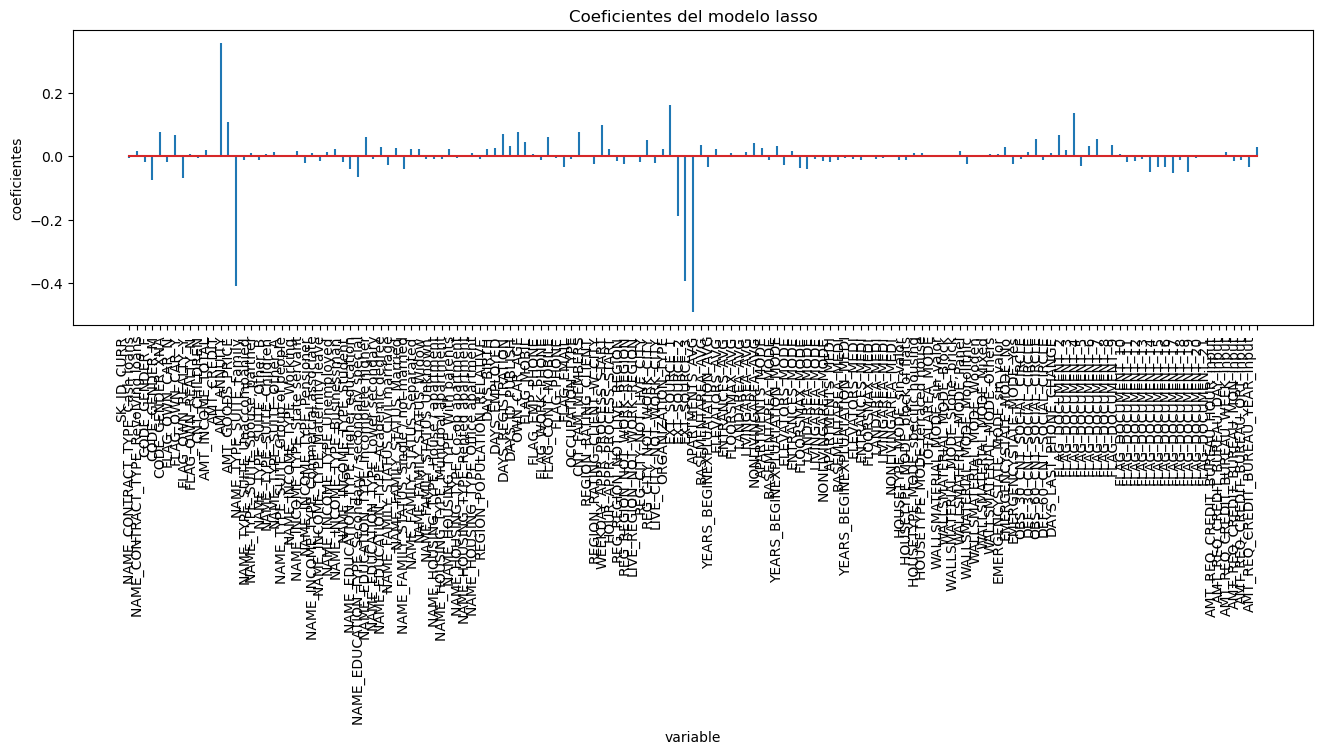

In [28]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes_lasso = pd.DataFrame(
    {'predictor': X_train_scaled.columns,
     'coef': sel_lasso.estimator_.coef_.flatten()}
     )


fig, ax = plt.subplots(figsize=(16, 3.84))
ax.stem(df_coeficientes_lasso.predictor, df_coeficientes_lasso.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo lasso');

## 4.1.3 ElasticNet 

El propósito fundamental de ElasticNet es realizar regresión regularizada combinando las propiedades de Ridge y Lasso para manejar datasets con muchas características, especialmente cuando:

1. Existen características correlacionadas: En casos donde varias variables están fuertemente correlacionadas, ElasticNet puede seleccionar más de una característica relevante del grupo, a diferencia de Lasso, que suele seleccionar solo una.
2. El número de características es mayor que el número de observaciones: En datasets con muchas variables y pocos datos, ElasticNet ayuda a evitar el sobreajuste.
3. Se busca un modelo robusto y parsimonioso: ElasticNet no solo predice bien (robustez) sino que también puede eliminar características irrelevantes (parsimonia), gracias a su componente 𝐿1.

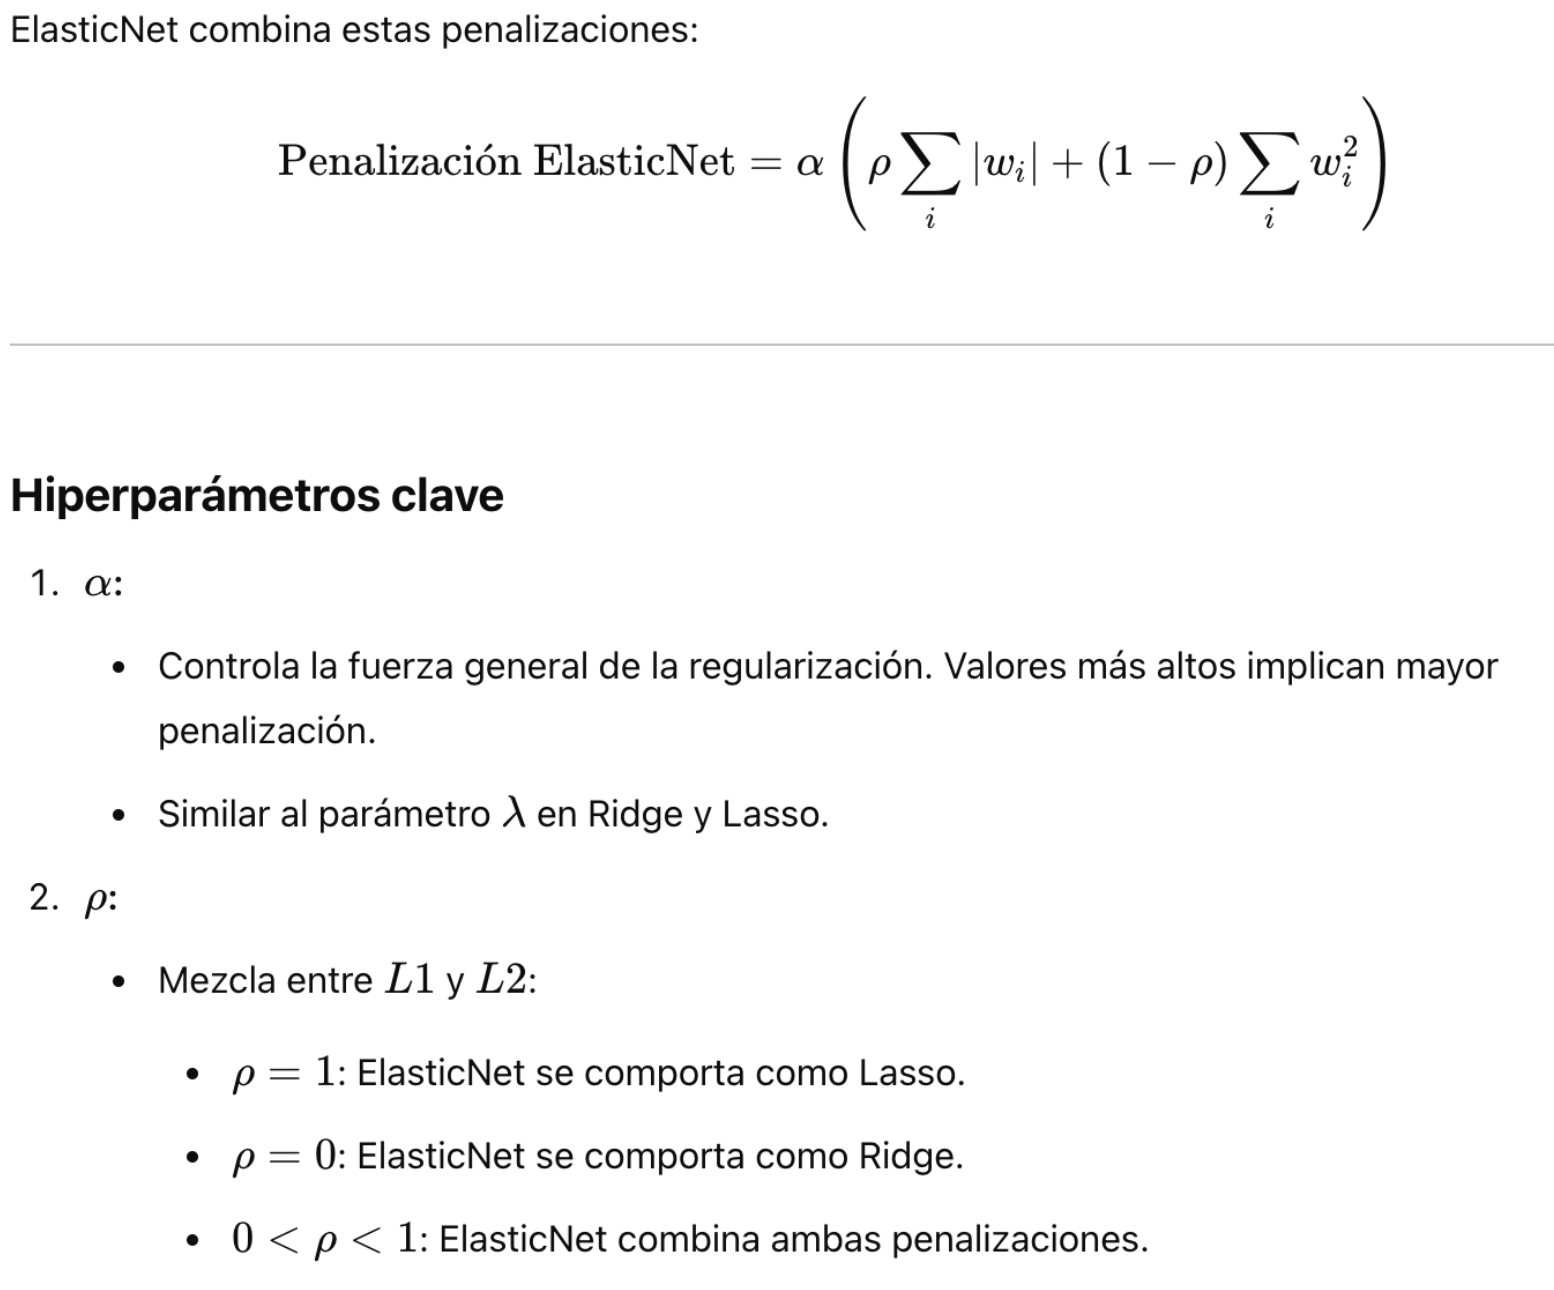

In [53]:
sel_elas = SelectFromModel(LogisticRegression(C= 1, penalty='elasticnet', l1_ratio=0.7,
                                               solver='saga', class_weight='balanced'), threshold=0.05)
sel_elas.fit(X_train_scaled, y_train)

/opt/miniconda3/envs/aa_p2_eda/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


SelectFromModel(estimator=LogisticRegression(C=1, class_weight='balanced',
                                             l1_ratio=0.7, penalty='elasticnet',
                                             solver='saga'),
                threshold=0.05)

In [54]:
selected_feat_lasso = X_train_scaled.columns[sel_lasso.get_support()]
selected_feat_lasso

Index(['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_3'],
      dtype='object')

In [55]:
print('total features: {}'.format((X_train_scaled.shape[1])))
print('selected features: {}'.format(len(selected_feat_lasso)))

total features: 149
selected features: 8


## Recursive Feature Elimination (RFE)

RFE (Recursive Feature Elimination, o Eliminación Recursiva de Características) es una técnica de selección de características que elimina recursivamente las menos importantes con el objetivo de reducir el conjunto de características a las más relevantes para un modelo predictivo.

Ventajas: 
- Puede utilizarse con cualquier modelo que presente coeficientes (Regresión lineal, Random Forest,...)
- Se puede determinar el número de variables finales que quieres, esto mismo no se puede hacer con los métodos anteriores.

Desventajas:
- Costoso a nivel de computación y tiempo 
- Si 2 variables están altamente correlacionadas y son importantes puede eliminar una de ellas debido a como calcula la importancia de las características 
- No garantiza una solución global optima. Puede quedarse atrapado en un subconjunto localmente óptimo.
- Si el modelo base no captura relaciones complejas (modelo lineal), no detectetará relaciones no lineales de características importantes.

In [21]:
# feature extraction
model = DecisionTreeClassifier()
# model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=20, verbose=1) #verbose=1 para ver iterativamente que pasa,
# n_features_to_select: por defecto se selecciona la mitad si no pones este parámetro , n_features_to_select=30
fit = rfe.fit(X_train_scaled, y_train)


print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Fitting estimator with 149 features.
Fitting estimator with 148 features.
Fitting estimator with 147 features.
Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
F

In [24]:
print(len(X_train_scaled.columns[fit.support_]), len(X_train_scaled.columns))

20 149


In [25]:
X_train_scaled.columns[fit.support_]

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'LANDAREA_AVG', 'LIVINGAREA_MODE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [17]:
selected_feat_rfe = [
    'SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
    'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
    'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
    'OCCUPATION_TYPE', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
    'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
    'YEARS_BEGINEXPLUATATION_AVG', 'LANDAREA_AVG', 'LIVINGAREA_MODE',
    'DAYS_LAST_PHONE_CHANGE'
]


# Boruta 

El propósito fundamental de Boruta es identificar las variables realmente relevantes para un modelo predictivo al comparar su importancia con la de versiones aleatorizadas de las mismas (shadow features). De esta forma, garantiza que las variables seleccionadas aporten información significativa más allá del ruido o el azar, optimizando la calidad del modelo y reduciendo la dimensionalidad del conjunto de datos.

1. Crear shadow features
Se generan shadow features, que son copias aleatorizadas de las características originales. Estas mantienen la misma distribución estadística que las originales, pero sus valores están completamente desordenados. Estas características sirven como referencia (benchmark) para medir si las variables originales son más relevantes que el ruido.

2. Entrenar un modelo Random Forest
Se entrena un modelo Random Forest utilizando las características originales y las shadow features. Este modelo estima la importancia de cada variable según su capacidad para reducir la impureza (como el Gini o entropía) en los árboles de decisión.

3. Evaluar la importancia de las variables
Tras el entrenamiento, se obtiene la importancia de cada característica (original y shadow) en el modelo. Se identifica la shadow feature más importante para usarla como referencia en las comparaciones posteriores.
Cada característica original se compara con la shadow feature más importante:
    - Relevante: Si una variable original tiene mayor importancia que la mejor shadow feature de forma consistente.
    - Irrelevante: Si una variable tiene igual o menor importancia que la mejor shadow feature.
    - Tentativa: Si no se puede determinar claramente su relevancia en esta iteración.

4. Iteración y selección
Este proceso se repite de forma iterativa para aumentar la confianza de los resultados 



In [18]:
## Como 'np.int' fue depreciado en Numpy 1.2 y eliminado en NumPy 1.24, lo que he hecho es asignar el valor que tiene actual 
## actualmente a estos casos, así al llamar al boruta lo entiende con los valores correctos.
np.int = np.int32
np.float = np.float64
np.bool = np.bool_


In [23]:
# sampling in proportion to y labels
modelo = RandomForestClassifier(n_jobs=-1, max_depth=5) # cambiar los hiperparametros

# define Boruta feature selection method
feat_selector = BorutaPy(modelo, n_estimators='auto', verbose=2, random_state=1, max_iter=100)
    # de base max_iter = 100 

# find all relevant features - 5 features should be selected
feat_selector.fit(X_train_scaled.values, y_train.values) # Importante poner el .values al dataframe, sino dará error

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	149
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	149
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	149
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	149
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	149
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	149
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	149
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	56
Tentative: 	12
Rejected: 	81
Iteration: 	9 / 100
Confirmed: 	56
Tentative: 	12
Rejected: 	81
Iteration: 	10 / 100
Confirmed: 	56
Tentative: 	12
Rejected: 	81
Iteration: 	11 / 100
Confirmed: 	56
Tentative: 	12
Rejected: 	81
Iteration: 	12 / 100
Confirmed: 	56
Tentative: 	12
Rejected: 	81
Iteration: 	13 / 100
Confirmed: 	56
Tentative: 	12
Rejected: 	81
Iteration: 	14 / 100
Confirmed: 	56
Tentative: 	12
Rejected: 	81
Iteration: 	15 / 100
Confirmed: 	56
Tentative: 	11
Rejected: 	82
Iteration: 	16 / 100
Confirmed: 	57
Tenta

array([13,  1,  1,  1,  1, 89,  1,  1, 62, 77,  8,  1,  1,  1,  1, 54, 46,
       71, 52, 51, 59, 44,  1, 30,  1, 32, 45, 35, 89, 89,  1,  1, 43, 29,
       84, 35,  1,  5, 56, 40, 89, 27, 65, 17, 55, 36, 71,  1,  1,  1,  1,
        1,  1, 89,  1,  9, 62, 39, 59,  1,  5,  1,  1, 41,  1, 79, 71, 73,
        1,  1, 11,  1,  1,  1,  1,  1, 12,  1,  1, 27,  1, 15,  1, 20,  1,
       28,  1,  1, 20,  1, 22,  1, 25,  1, 14,  1,  1, 22,  1, 18,  1, 16,
        2,  1, 48, 69,  1,  5, 68, 54, 11, 62, 49, 74, 43,  1,  1, 62, 33,
        2, 32,  5,  1, 37,  1, 89, 62,  8, 82, 38, 82, 89, 67, 89, 80, 78,
       75, 51, 83, 67, 57, 77, 47,  1,  1,  1, 22, 24,  1], dtype=int32)

In [29]:
selected_feat_boruta = X_train_scaled.columns[feat_selector.support_]
selected_feat_boruta

Index(['NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans',
       'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_INCOME_TYPE_Working', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Married', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'FLAG_EMP_PHONE', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'FLOORSMAX_AVG',
       'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'YEARS_BEGINEXPLUATATION_MODE

One limitation of these metrics is that they assume that the class distribution observed in the training dataset will match the distribution in the test set and in real data when the model is used to make predictions. This is often the case, but when it is not the case, the performance can be quite misleading.



# Breve evaluación de los selectores 

In [66]:
from sklearn.dummy import DummyClassifier  # Para DummyClassifier
from sklearn.naive_bayes import GaussianNB  # Para Gaussian Naive Bayes
from sklearn.metrics import fbeta_score, average_precision_score, accuracy_score, recall_score

selected_features = {
    "Lasso": selected_feat_lasso,
    "Ridge": selected_feat_ridge,
    "RFE": selected_feat_rfe,
    "Boruta": selected_feat_boruta
}

# Variables seleccionadas por Boruta
X_train_boruta = X_train_scaled[selected_feat_boruta]
X_test_boruta = X_test_scaled[selected_feat_boruta]

# Variables seleccionadas por otros métodos
X_train_lasso = X_train_scaled[selected_feat_lasso]
X_test_lasso = X_test_scaled[selected_feat_lasso]

X_train_ridge = X_train_scaled[selected_feat_ridge]
X_test_ridge = X_test_scaled[selected_feat_ridge]

X_train_rfe = X_train_scaled[selected_feat_rfe]
X_test_rfe = X_test_scaled[selected_feat_rfe]


models = {
    "Dummy": DummyClassifier(strategy="most_frequent"),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier()
}

In [67]:
# Lista de modelos representativos
evaluation_results = {}

# Evaluar cada modelo con cada conjunto de características seleccionadas
for model_name, model in models.items():
    evaluation_results[model_name] = {}
    for selector_name, selected_features_list in selected_features.items():
        # Filtrar las características seleccionadas
        X_train_selected = X_train_scaled[selected_features_list]
        X_test_selected = X_test_scaled[selected_features_list]

        # Entrenar el modelo
        model.fit(X_train_selected, y_train)

        # Predecir en el conjunto de prueba
        y_pred = model.predict(X_test_selected)
        y_pred_proba = model.predict_proba(X_test_selected)[:, 1]  # Probabilidades (si están disponibles)

        # Calcular métricas
        f2 = fbeta_score(y_test, y_pred, beta=2)
        pr_auc = average_precision_score(y_test, y_pred_proba)
        accuracy = accuracy_score(y_test, y_pred)
        sensitivity = recall_score(y_test, y_pred)  # Sensitividad = Recall

        # Almacenar resultados
        evaluation_results[model_name][selector_name] = {
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "F2-score": f2,
            "PR AUC": pr_auc,
        }


In [68]:
# Mostrar resultados
for model_name, scores in evaluation_results.items():
    print(f"Resultados para {model_name}:")
    for selector_name, metrics in scores.items():
        print(f"""{selector_name}: 
              Accuracy = {metrics['Accuracy']:.4f},
              Sensitivity = {metrics['Sensitivity']:.4f},
              F2-score = {metrics['F2-score']:.4f}, 
              PR AUC = {metrics['PR AUC']:.4f}""")

Resultados para Dummy:
Lasso: 
              Accuracy = 0.9193,
              Sensitivity = 0.0000,
              F2-score = 0.0000, 
              PR AUC = 0.0807
Ridge: 
              Accuracy = 0.9193,
              Sensitivity = 0.0000,
              F2-score = 0.0000, 
              PR AUC = 0.0807
RFE: 
              Accuracy = 0.9193,
              Sensitivity = 0.0000,
              F2-score = 0.0000, 
              PR AUC = 0.0807
Boruta: 
              Accuracy = 0.9193,
              Sensitivity = 0.0000,
              F2-score = 0.0000, 
              PR AUC = 0.0807
Resultados para Naive Bayes:
Lasso: 
              Accuracy = 0.9090,
              Sensitivity = 0.1080,
              F2-score = 0.1243, 
              PR AUC = 0.1954
Ridge: 
              Accuracy = 0.7488,
              Sensitivity = 0.5015,
              F2-score = 0.3525, 
              PR AUC = 0.1857
RFE: 
              Accuracy = 0.9090,
              Sensitivity = 0.0510,
              F2-score = 0.0

# Inferencia de ir alterando los hiperparámetros de Lasso y Ridge 

### 1. (LogisticRegression(C= 2, penalty='11', solver='saga'), threshold=0.05) --> 20 variables 
### 2. (Logist1cRegression(C=1, penalty='12'), threshold = 0.02) --> 81 variables 

Resultados para Naive Bayes:
  - Lasso: F2-score = 0.2383, PR AUC = 0.1832
  - Ridge: F2-score = 0.3070, PR AUC = 0.0830

Resultados para Logistic Regression:
  - Lasso: F2-score = 0.0098, PR AUC = 0.2119
  - Ridge: F2-score = 0.0110, PR AUC = 0.2162

Resultados para Decision Tree:
  - Lasso: F2-score = 0.1573, PR AUC = 0.0904
  - Ridge: F2-score = 0.1618, PR AUC = 0.0907


### 1. (LogisticRegression(C= 1, penalty='l1', solver='saga'), threshold=0.05) --> 20 variables 
### 2. (LogisticRegression(C=1, penalty='l2'), threshold = 0.06) --> 43 variables 
  - Aumentar el threshold de l2 ha tenido un efecto significativo en Naive Bayes 

Resultados para Naive Bayes:
  - Lasso: F2-score = 0.2383, PR AUC = 0.1832
  - Ridge: F2-score = 0.3075, PR AUC = 0.1794

Resultados para Logistic Regression:
  - Lasso: F2-score = 0.0098, PR AUC = 0.2119
  - Ridge: F2-score = 0.0118, PR AUC = 0.2129

Resultados para Decision Tree:
  - Lasso: F2-score = 0.1626, PR AUC = 0.0912
  - Ridge: F2-score = 0.1584, PR AUC = 0.0899


### 1. (LogisticRegression(C= 1, penalty='l1', solver='saga'), threshold=0.1) --> 7 variables
### 2. (LogisticRegression(C=1, penalty='l2'), threshold = 0.1) --> 26 variables

Resultados para Naive Bayes:
  - Lasso: F2-score = 0.2383, PR AUC = 0.1832
  - Ridge: F2-score = 0.3075, PR AUC = 0.1794

Resultados para Logistic Regression:
  - Lasso: F2-score = 0.0098, PR AUC = 0.2119
  - Ridge: F2-score = 0.0118, PR AUC = 0.2129

Resultados para Decision Tree:
  - Lasso: F2-score = 0.1622, PR AUC = 0.0912
  - Ridge: F2-score = 0.1599, PR AUC = 0.0903



## Evaluación

Lo que he hecho es entrenar una serie de modelos básicos para probar que tan buenos resultados dan dependiendo de la selección de variables. Para comprobar la efectividad de estos, he calculado de diferentes métricas: 
- Accuracy. Aunque en este hay que tener cuidado, ya que tenemos una muestra desbalanceada, siempre es útil ponerla para poder comprender el 'trade-off' que estamos haciendo cuando alguna métrica mejora.
- Senstivity. Esta métrica es idónea para el caso, además es la más sencilla de interpretar para ver como de bien se predice la clase minoritaria 
- F2-Score. Esta medida mezcla precisión y recall, dando una visión más general de la eficiencia conseguida.
- PC AUR. Otra forma de analizar los resultados del modelo que se basa en la precision y recall, muy parecida a la anterior.

Para evaluar los modelos me he basado principalmente en la información que podemos encontrar en: https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

Decir también que he ido cambiando los hiperparámetrod de ridge y lasso para ver si estos tienen un impacto significativo en el resultado final. Con el **Boruta** y con **RFE** no lo he hecho por varios motivos. 

Son sistemas que para realizar la evaluación de las características se basan en crear subconjuntos de datos de forma iterativa. Esto implica que en datasets grandes, como este (149 vairables), necesitan mucho poder de computación, lo que se traduce en tiempo. Esto sumado a que en una primera evaluación he podido ver que el selector ridge funciona mejor consistentemente ha sido suficiente para descartarlos.

Para intentar mejorar un poco los resultados en el proceso de selección, he cambiado los umbrales, en algún caso también el valor de C pero la realidad es que la variación en los estos hiperparámetros no llega a ser sustancial en ningún caso.

También he probado a añadir class_weighted = 'balanced' en los parámetros del modelo. Implicó una ligera mejora en la mayoría de los modelos. Pero en el caso de Naive-Bayes llevo a un overfitting elevadísimo, por lo que he considerado mejor no añadirlo.

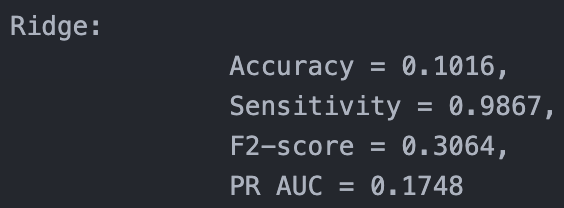


# Almacenado de tablas 

In [75]:

X_test_scaled[selected_feat_ridge]
pd.concat([X_train_scaled[selected_feat_ridge], y_train], axis=1).to_csv('../data/df_train_scaled.csv', index=False)

X_test_scaled[selected_feat_ridge]
pd.concat([X_test_scaled[selected_feat_ridge], y_test], axis=1).to_csv('../data/df_test_scaled.csv', index=False)
